In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import logit
from sklearn.preprocessing import MinMaxScaler

### Configuration
Configure the notebooks to make a better look and feel which assists to do the analysis in easy ways.

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df = df.drop(columns=['Q_1', 'Q_14', 'Q_15', 'Q_37_i', 'Q_37_ii', 'Q_37_iii', 'Q_37_iv', 'Q_37_v', 'Q_37_vi', 'Q_37_vii', 'Q_37_viii', 'Q_37_ix', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv', 'Q_35_i', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_v', 'Q_35_vi'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_36
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes
2,Female,26,10,115000,Dead,Dead,Yes,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,Yes
3,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very_much,Good,Urban,No,Average,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very_much,Good,Yes,Yes


In [4]:
for i in [i for i in df.columns if df[i].dtype=='object']:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out  No  Yes
Q_2              
Female    29   46
Male      37   98
------------------
Drop_out  No  Yes
Q_6              
Adults    63  119
Dead       0    4
Seniors    0   14
------------------
Drop_out  No  Yes
Q_7              
Adults    66  141
Dead       0    3
------------------
Drop_out  No  Yes
Drop_out         
No        66    0
Yes        0  144
------------------
Drop_out          No  Yes
Q_8                      
Higher_Education  25    7
Primary           24   93
Secondary         17   44
------------------
Drop_out   No  Yes
Q_9               
Less        5   41
Neutral     9   18
Very_much  52   85
------------------
Drop_out  No  Yes
Q_10             
Average   11   73
Bad        2   16
Good      53   55
------------------
Drop_out  No  Yes
Q_11             
Rural     36  117
Urban     30   27
------------------
Drop_out        No  Yes
Q_12                   
No               0   91
Not_Applicable  66    0
Yes              0   53
------------------
Drop_out  No  Ye

In [5]:
df = df.drop(columns=['Q_12', 'Q_20'])

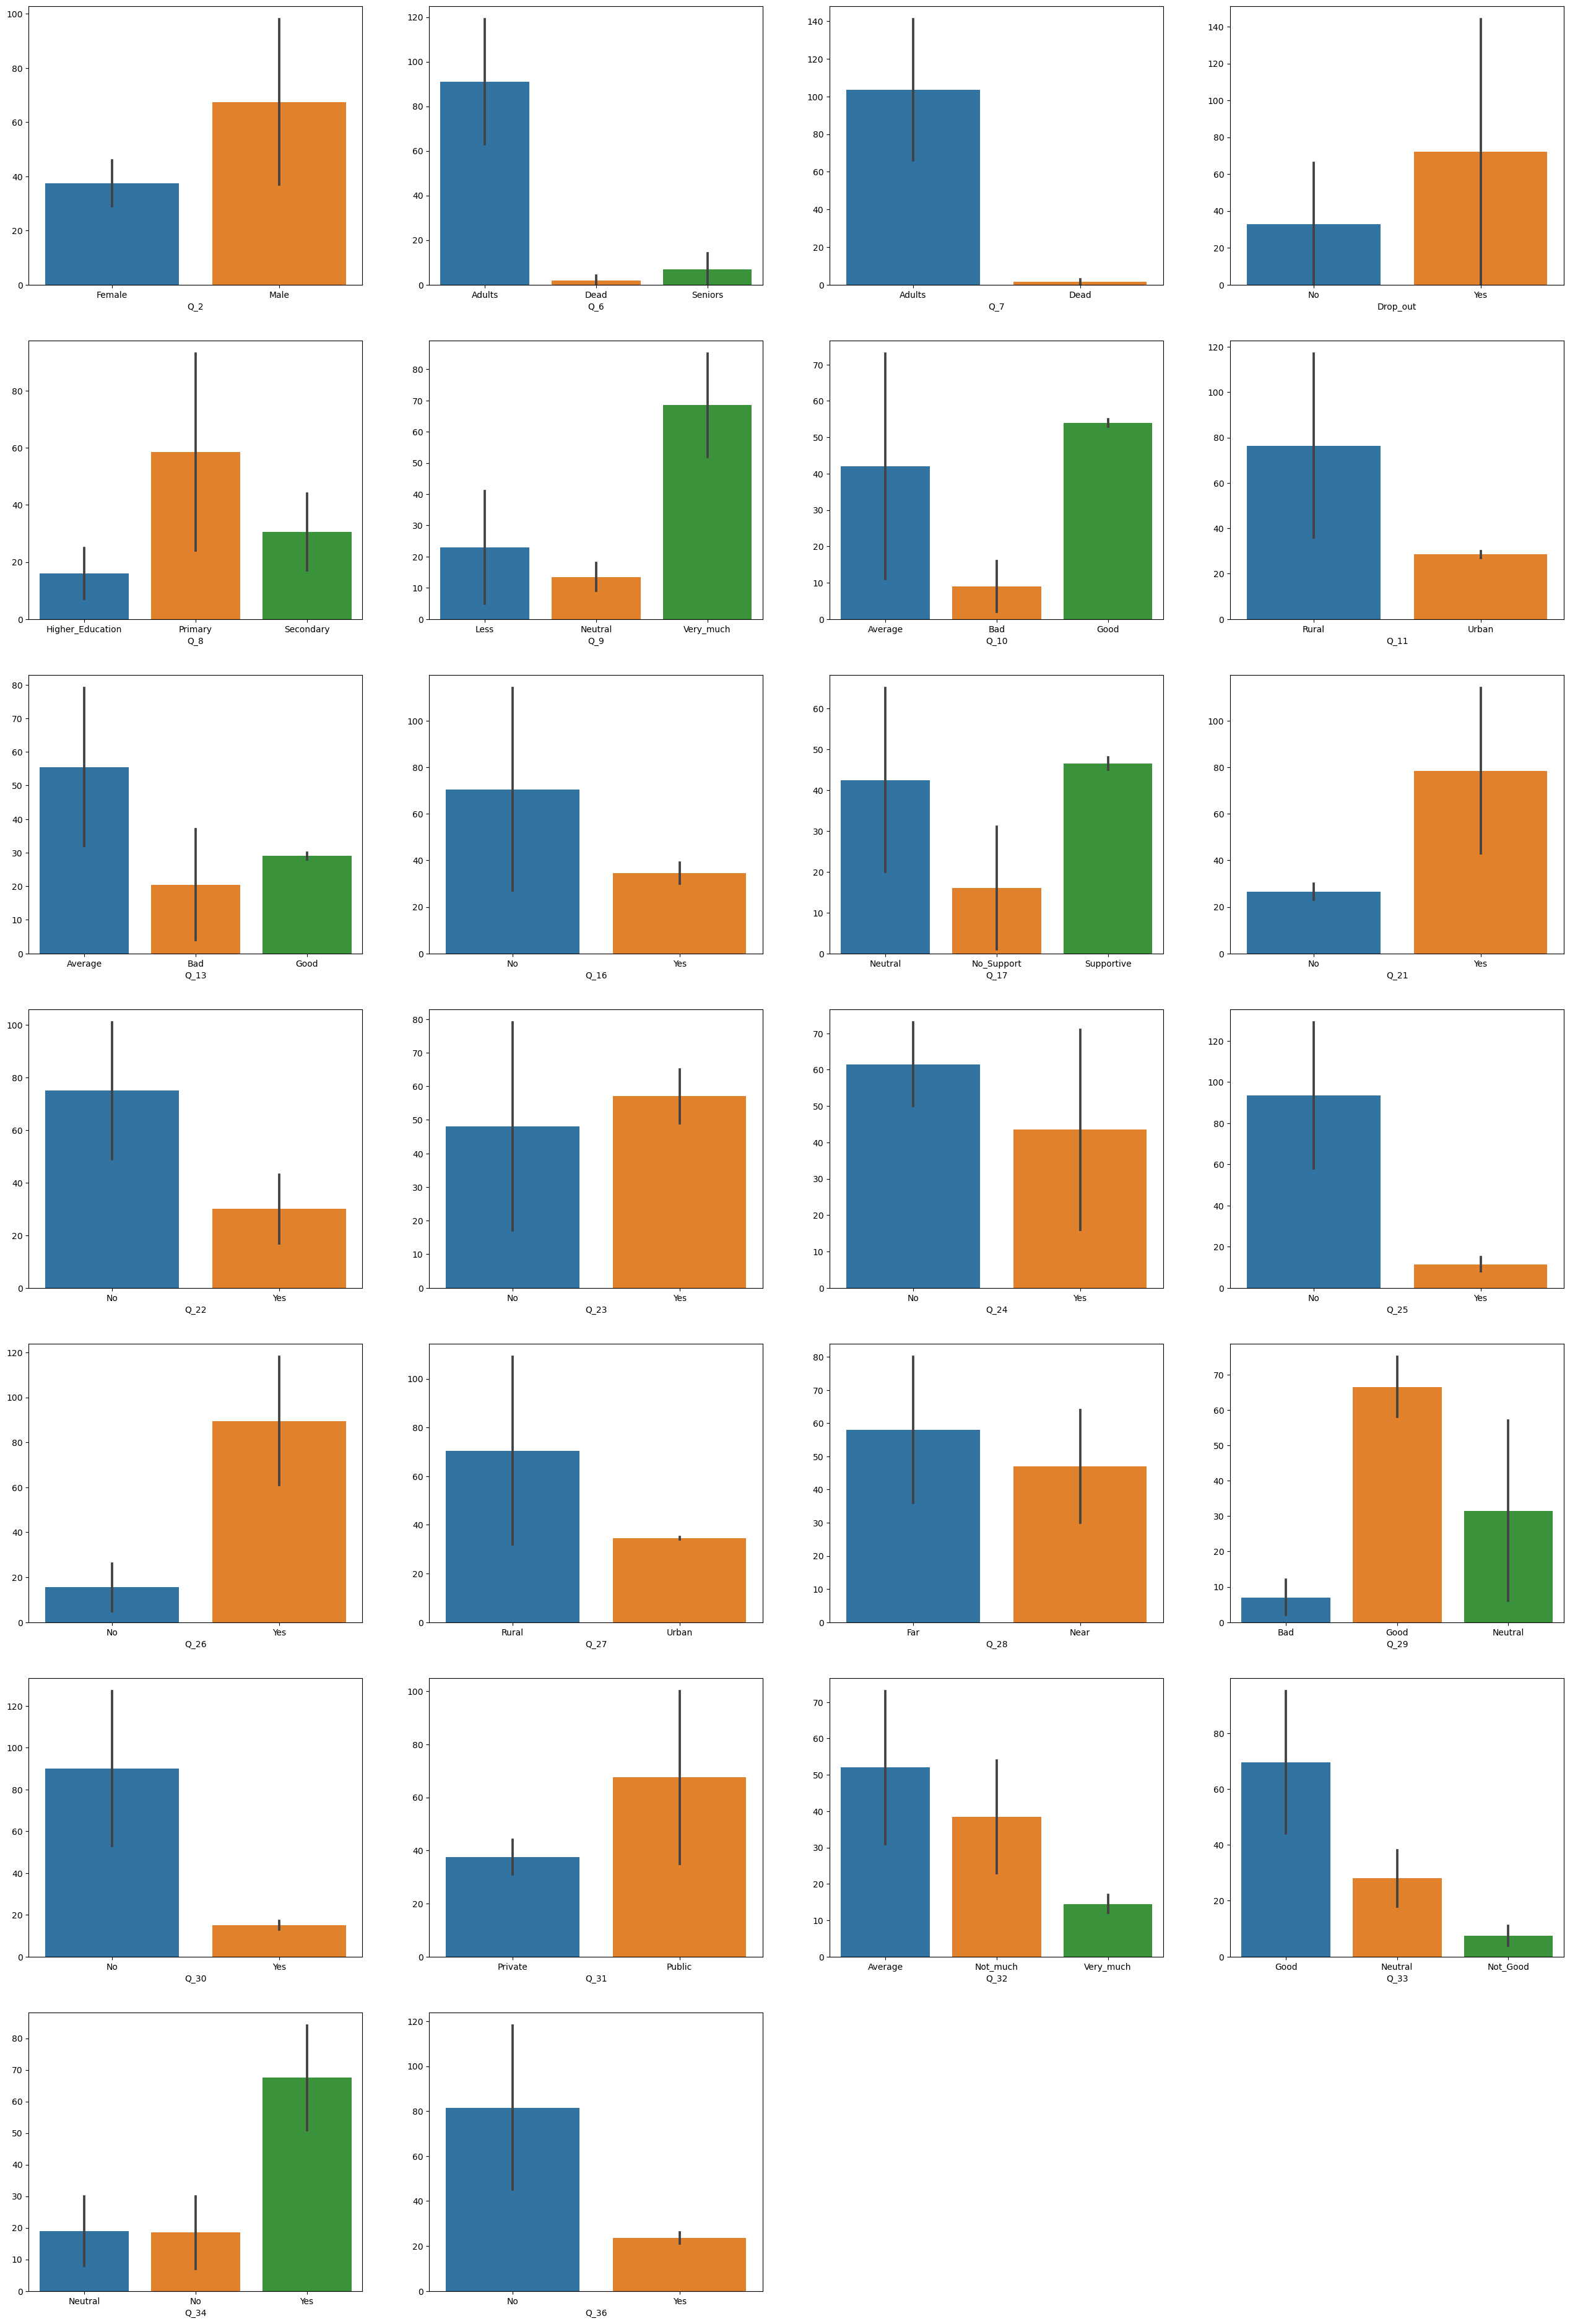

In [6]:
fig = plt.figure(figsize=(32, 90))
k = 1
for i in [i for i in df.columns if df[i].dtype=='object']:
    plt.subplot(13, 4, k)
    crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
    sns.barplot(crs)
    # sns.heatmap(crs)
    k += 1

plt.show()

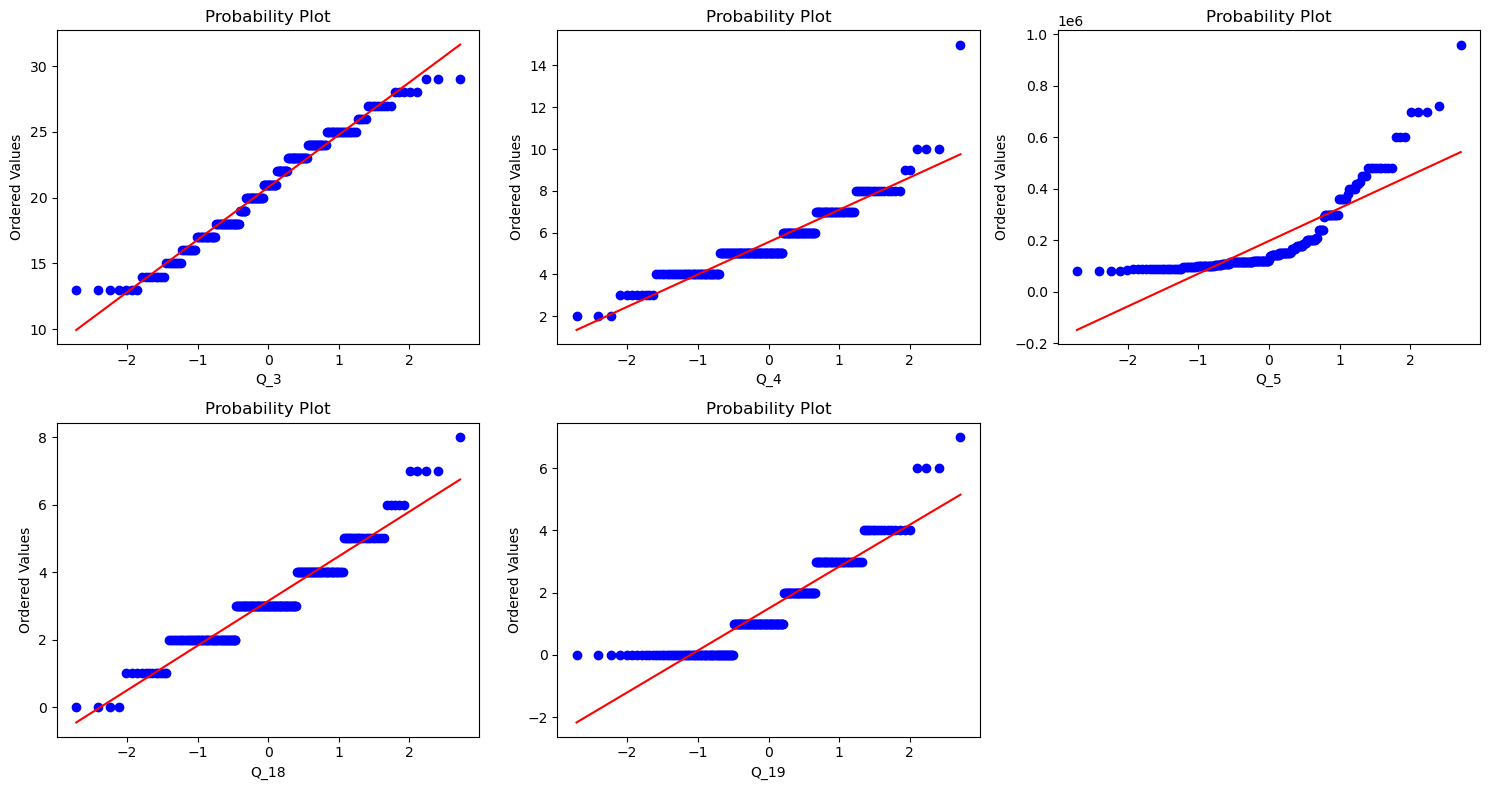

In [7]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in [i for i in df.columns if df[i].dtype!='object']:
    plt.subplot(2, 3, k)
    # sns.distplot(df[i], hist=False, kde=True)
    pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

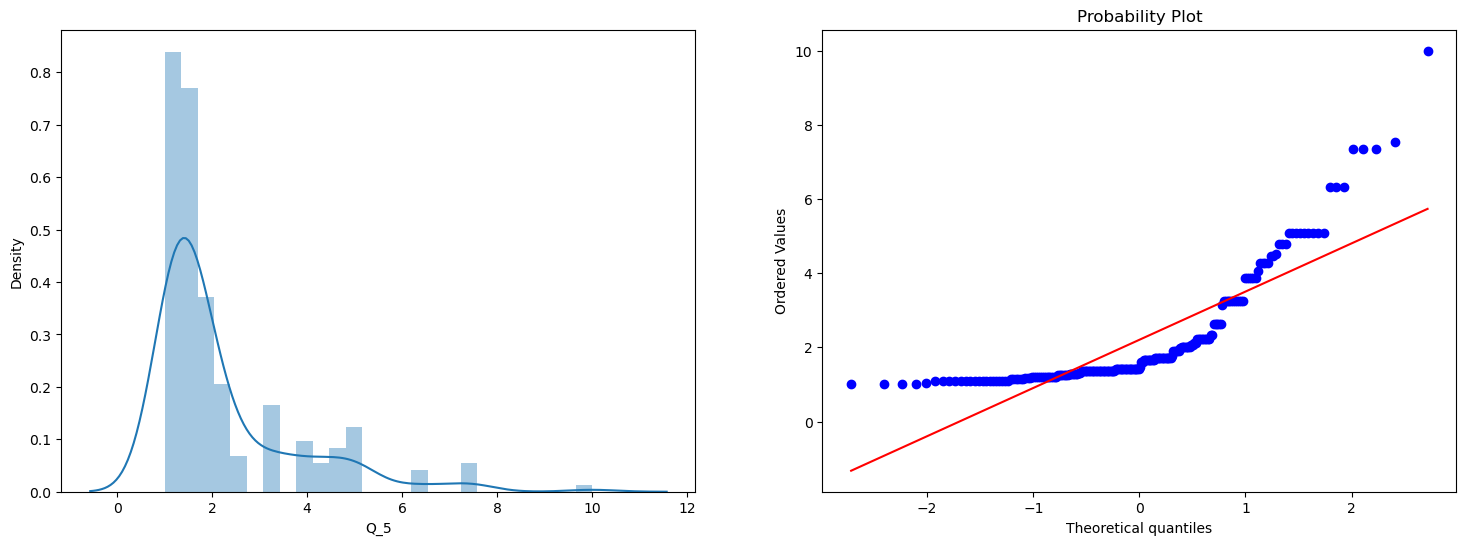

In [8]:
sc = MinMaxScaler(feature_range=(1,10))

df['Q_5'] = sc.fit_transform(df[['Q_5']])
fig , g = plt.subplots(1,2, figsize=(18,6))
# Histogram
g1 = sns.distplot(df['Q_5'], ax=g[0]);
# QQPlot
g2 = stats.probplot(df['Q_5'], dist='norm', plot=plt);

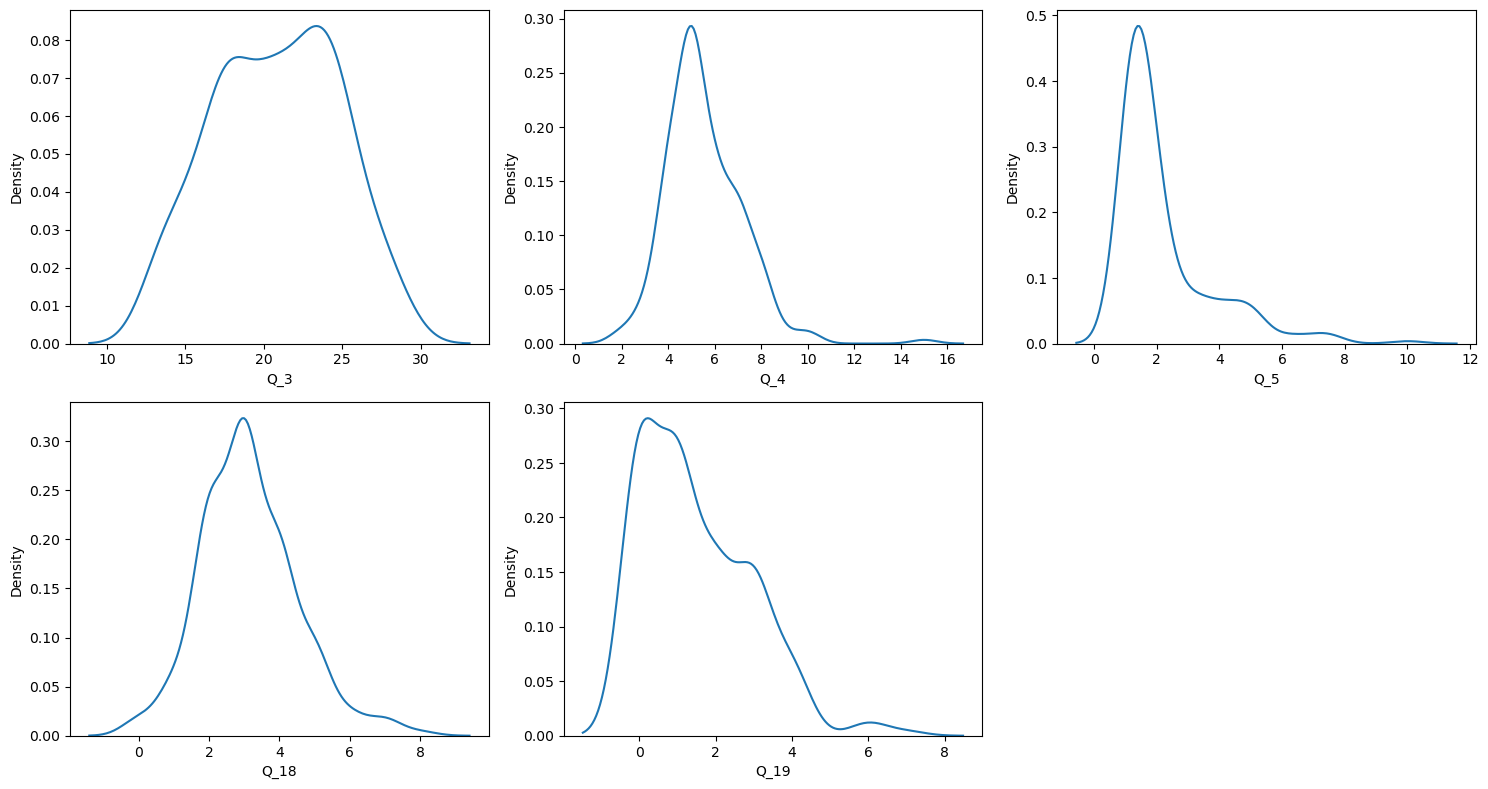

In [9]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in [i for i in df.columns if df[i].dtype!='object']:
    plt.subplot(2, 3, k)
    sns.distplot(df[i], hist=False, kde=True)
    # pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

In [10]:
data = df.copy()
data.head(2)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_13,Q_16,Q_17,Q_18,Q_19,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_36
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,1.715909,Seniors,Dead,Yes,Primary,Less,Bad,Rural,Average,No,Neutral,7,6,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes
2,Female,26,10,1.357955,Dead,Dead,Yes,Primary,Very_much,Good,Rural,Average,Yes,Supportive,8,7,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,Yes


In [11]:
sig_factors = []

for i in [i for i in df.columns if df[i].dtype=='object']:
    crs = pd.crosstab(index=data['Drop_out'], columns=data[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

sig_factors += [i for i in df.columns if df[i].dtype!='object']
print(sig_factors)

['Q_6', 'Drop_out', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_13', 'Q_16', 'Q_17', 'Q_21', 'Q_23', 'Q_24', 'Q_27', 'Q_29', 'Q_31', 'Q_34', 'Q_36', 'Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']


In [14]:
in_sig = [i for i in data.columns if i not in sig_factors and i != 'Drop_out']
print(in_sig)
data = data.drop(columns=in_sig)
data.dtypes.value_counts()

[]


object     17
int64       4
float64     1
dtype: int64

In [15]:
cat = [i for i in data.columns if data[i].dtype=='object']
data = pd.get_dummies(data, columns=cat, drop_first=True)
data.head(3)

,Q_3,Q_4,Q_5,Q_18,Q_19,Q_6_Dead,Q_6_Seniors,Drop_out_Yes,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very_much,Q_10_Bad,Q_10_Good,Q_11_Urban,Q_13_Bad,Q_13_Good,Q_16_Yes,Q_17_No_Support,Q_17_Supportive,Q_21_Yes,Q_23_Yes,Q_24_Yes,Q_27_Urban,Q_29_Good,Q_29_Neutral,Q_31_Public,Q_34_No,Q_34_Yes,Q_36_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,1.715909,7,6,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,26,10,1.357955,8,7,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1
3,26,6,1.409091,4,4,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1


In [16]:
fs = "Drop_out_Yes ~ "
for i in data.columns:
    if i != "Drop_out_Yes":
        fs = fs + " + " + i
    
print(fs)

Drop_out_Yes ~  + Q_3 + Q_4 + Q_5 + Q_18 + Q_19 + Q_6_Dead + Q_6_Seniors + Q_8_Primary + Q_8_Secondary + Q_9_Neutral + Q_9_Very_much + Q_10_Bad + Q_10_Good + Q_11_Urban + Q_13_Bad + Q_13_Good + Q_16_Yes + Q_17_No_Support + Q_17_Supportive + Q_21_Yes + Q_23_Yes + Q_24_Yes + Q_27_Urban + Q_29_Good + Q_29_Neutral + Q_31_Public + Q_34_No + Q_34_Yes + Q_36_Yes


In [17]:
log_reg = logit(formula=fs, data=data).fit()

         Current function value: 0.181482
         Iterations: 35


In [18]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Drop_out_Yes   No. Observations:                  210
Model:                          Logit   Df Residuals:                      180
Method:                           MLE   Df Model:                           29
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:                  0.7085
Time:                        22:25:21   Log-Likelihood:                -38.111
converged:                      False   LL-Null:                       -130.72
Covariance Type:            nonrobust   LLR p-value:                 1.080e-24
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9826      4.769     -1.045      0.296     -14.330       4.365
Q_3                 0.3071      0.163      1.888      0.059      -0.012       0.626
Q_4                 0.3786      0.386      0.980      0.327      -0.378       1.136
Q_5                -1.0244      0.302     -3.396      0.001      -1.616      -0.433
Q_18               -0.9880      0.517     -1.912      0.056      -2.001       0.025
Q_19                1.5752      0.561      2.810      0.005       0.477       2.674
Q_6_Dead            7.9510    435.027      0.018      0.985    -844.687     860.589
Q_6_Seniors        12.6910    837.098      0.015      0.988   -1627.991    1653.373
Q_8_Primary         5.1207      1.273      4.023      0.000       2.626       7.616
Q_8_Secondary       4.2211      1.147      3.681      0.000       1.974       6.469
Q_9_Neutral        -1.7117      1.612     -1.062      0.288      -4.870       1.447
Q_9_Very_much       0.9329      1.365      0.683      0.494      -1.742       3.608
Q_10_Bad            0.1532      1.868      0.082      0.935      -3.508       3.815
Q_10_Good          -0.2676      0.976     -0.274      0.784      -2.181       1.646
Q_11_Urban         -0.7100      1.341     -0.529      0.597      -3.339       1.919
Q_13_Bad            0.6452      1.206      0.535      0.593      -1.718       3.009
Q_13_Good          -1.2880      0.938     -1.373      0.170      -3.127       0.551
Q_16_Yes           -2.4986      1.171     -2.133      0.033      -4.794      -0.203
Q_17_No_Support     4.4219      1.919      2.304      0.021       0.661       8.183
Q_17_Supportive     1.0847      0.819      1.324      0.185      -0.521       2.690
Q_21_Yes           -1.0693      0.926     -1.155      0.248      -2.885       0.746
Q_23_Yes            0.2892      1.005      0.288      0.773      -1.680       2.259
Q_24_Yes           -1.2087      1.102     -1.097      0.273      -3.369       0.951
Q_27_Urban         -0.4510      1.193     -0.378      0.705      -2.789       1.887
Q_29_Good          -2.2833      2.349     -0.972      0.331      -6.887       2.321
Q_29_Neutral       -0.2951      2.526     -0.117      0.907      -5.246       4.656
Q_31_Public        -0.4735      0.817     -0.579      0.562      -2.076       1.129
Q_34_No             2.4030      1.717      1.400      0.162      -0.962       5.768
Q_34_Yes            1.1942      1.485      0.804      0.421      -1.717       4.105
Q_36_Yes           -1.8450      1.304     -1.415      0.157      -4.401       0.711
===================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
model_odds = pd.DataFrame(np.exp(log_reg.params), columns= ['OR'])
model_odds['p-value']= log_reg.pvalues
model_odds[['Lower', 'Upper']] = np.exp(log_reg.conf_int())
model_odds

,OR,p-value,Lower,Upper
Intercept,0.006856,0.296156,5.975069e-07,78.665515
Q_3,1.359486,0.058972,9.884292e-01,1.869839
Q_4,1.460277,0.326870,6.850425e-01,3.112813
Q_5,0.359020,0.000683,1.987845e-01,0.648416
Q_18,0.372330,0.055921,1.352111e-01,1.025283
Q_19,4.831602,0.004950,1.610597e+00,14.494240
Q_6_Dead,2838.365741,0.985418,0.000000e+00,inf
Q_6_Seniors,324824.446381,0.987904,0.000000e+00,inf
Q_8_Primary,167.449946,0.000058,1.381429e+01,2029.744196
Q_8_Secondary,68.108827,0.000232,7.196275e+00,644.612969


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:
features = ["Q_5", "Q_19", "Q_8", "Q_13", "Q_16"]

In [23]:
X = df[features]
y = df[['Drop_out']]
y.head(2)

,Drop_out
Serial_no,
1,Yes
2,Yes


In [27]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head(3)

,Q_5,Q_19,Q_8_Primary,Q_8_Secondary,Q_13_Bad,Q_13_Good,Q_16_Yes
Serial_no,,,,,,,
1,1.715909,6,1,0,0,0,0
2,1.357955,7,1,0,0,0,1
3,1.409091,4,1,0,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.25, random_state = 0)

In [29]:
print(X_train.shape)
print(X_test.shape)

(157, 7)
(53, 7)


In [33]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc =accuracy_score(y_test, pred)
acc

0.7735849056603774

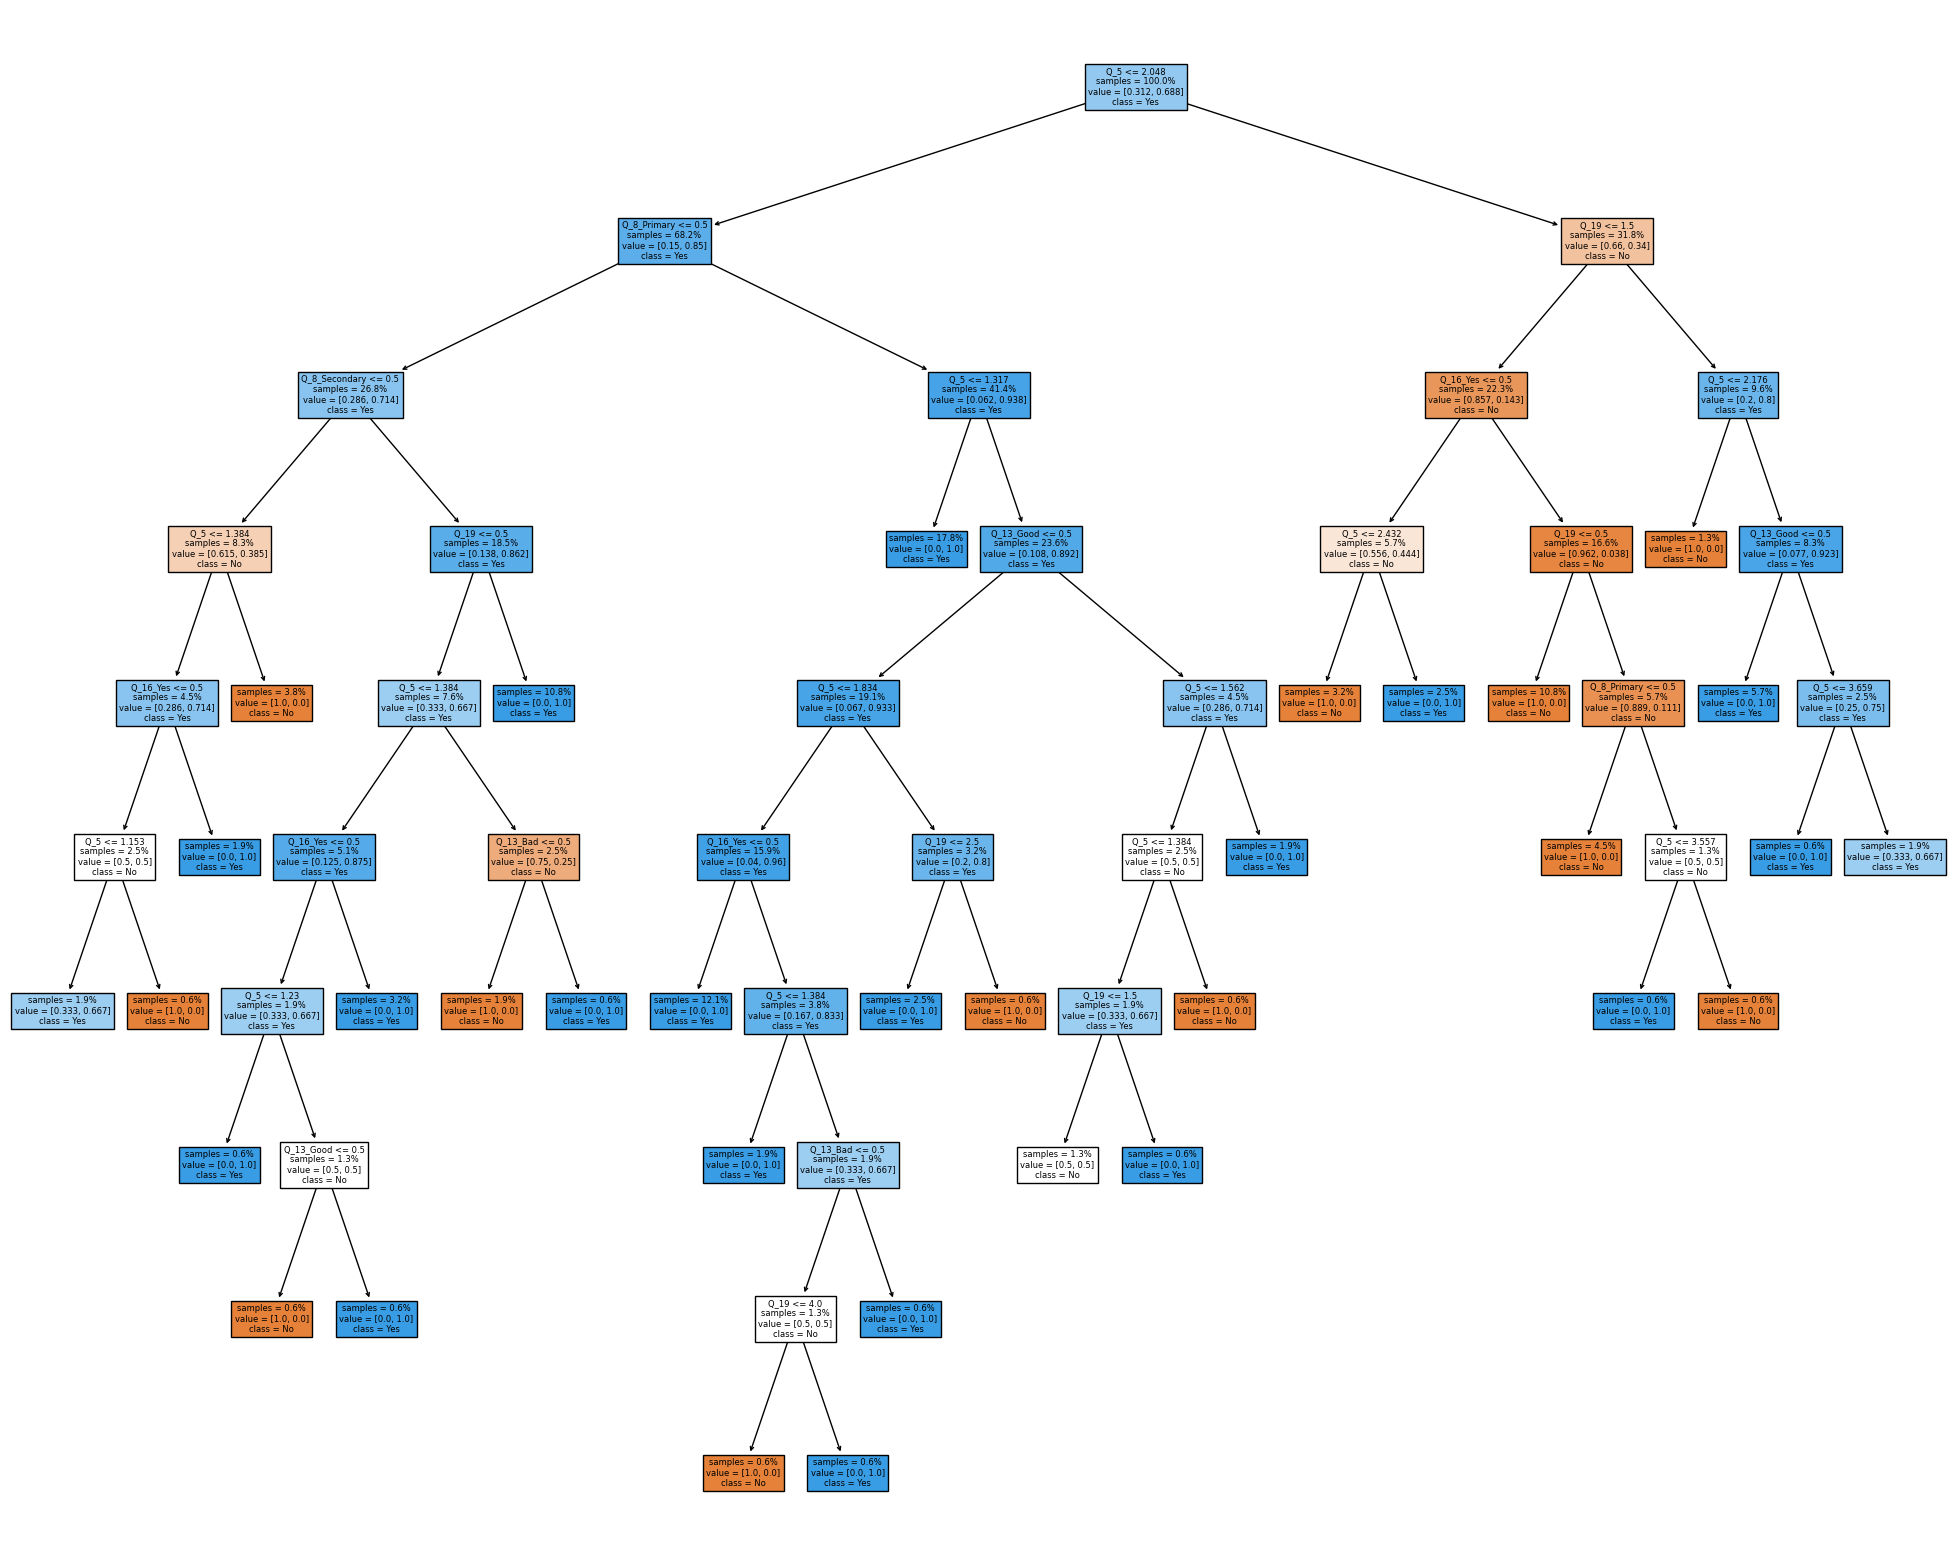

In [35]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dt,
            feature_names = X_encoded.columns,
            class_names=['No', 'Yes'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.show()